In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

### Square-root diffusion
A mean-reverting process widely used to model short rates or volatility processes.  
Proposed by Cox, Ingersoll, Ross in 1985  
https://www.investopedia.com/terms/c/cox-ingersoll-ross-model.asp

$$
dx_t = \kappa(\theta - x_t)dt + \sigma\sqrt{x_t} dZ_t \\
$$
  
#### where
$
x_t := Level \ at \ time \ t \\
\kappa := Mean-reversion\ factor \\
\theta:= Long-term \ mean \ of \ the \ process \\
\sigma := Constant \ Volatility \ parameter \\
Z := Standard \ Brownian \ motion
$

### Euler discretization for square-root diffusion
$$
\tilde{x_t}  = \tilde{x_s} + \kappa(\theta - \tilde{x_s}^+)\Delta t + \sigma \sqrt{\tilde{x_s}^+} \sqrt{\Delta t}z_t \\
$$
$$
x_t = \tilde{x_t}^+
$$

In [2]:
#Parameters
x0 = 0.05
kappa = 3.0
theta = 0.02
sigma = 0.1

T = 2
I = 10000
M = 50
dt = T/M

In [3]:
def srd_euler():
    xh = np.zeros((M + 1, I))
    x1 = np.zeros_like(xh)
    xh[0] = x0
    x1[0] = x0
    for t in range(1, M + 1):
        xh[t] = (xh[t - 1]
                 + kappa * (theta - np.maximum(xh[t - 1], 0)) * dt
                 + sigma * np.sqrt(np.maximum(xh[t - 1], 0)) * np.sqrt(dt) * npr.standard_normal(I))
    x1 = np.maximum(xh, 0)
    return x1

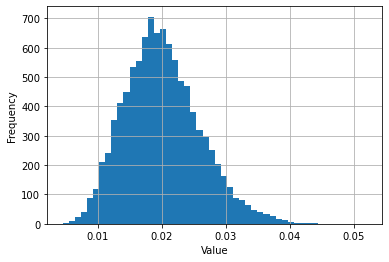

In [4]:
x1 = srd_euler()
plt.hist(x1[-1], bins=50)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True)

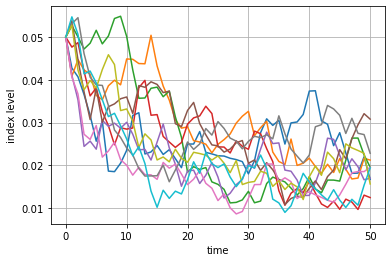

In [5]:
plt.plot(x1[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)
#Downward drift since theta < x0

The following equation presents the exact discretization scheme for the square-root diffusion based on the noncentral chi-square distribution $ \chi_d^{'2} $ with $ df = \frac{4 \theta_\kappa}{\sigma^2} $ degrees of freedom and noncentrality parameter $ nc =  \frac{4\kappa e^{-\kappa \Delta t}}{\sigma^2 (1-e^{-\kappa \Delta })} x_s$


Exact discretisation for square root diffusion:
$$
x_t = \frac{\sigma^2(1-e^{-\kappa \Delta t})}{4 \kappa} \chi ^{'2} \big(\frac{4 \kappa e^{-\kappa \Delta t}}{\sigma^2(1-e^{-\kappa \Delta t})}x_s \big)
$$

In [7]:
def srd_exact():
    x2 = np.zeros((M + 1, I))
    x2[0] = x0
    for t in range(1, M + 1):
        df = 4 * theta * kappa / sigma ** 2
        c = (sigma ** 2 * (1 - np.exp(-kappa * dt))) / (4 * kappa)
        nc = np.exp(-kappa * dt) / c * x2[t - 1]
        x2[t] = c * npr.noncentral_chisquare(df, nc, size=I)
    return x2
x2 = srd_exact()

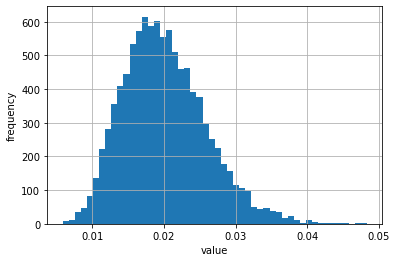

In [8]:
plt.hist(x2[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')
plt.grid(True)

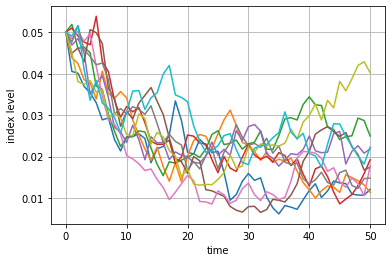

In [10]:
#first 10 simulated paths
plt.plot(x2[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)
#again, the negative drift

In [12]:
#comparing execution speed
I= 250000
%time x1 = srd_euler()

Wall time: 826 ms


In [13]:
%time x2 = srd_exact()

Wall time: 1.17 s
